This code is used to plot W40 H2 Column density map and dust temperature map from Herschel Gould Belt Survey (TRAO Fov)

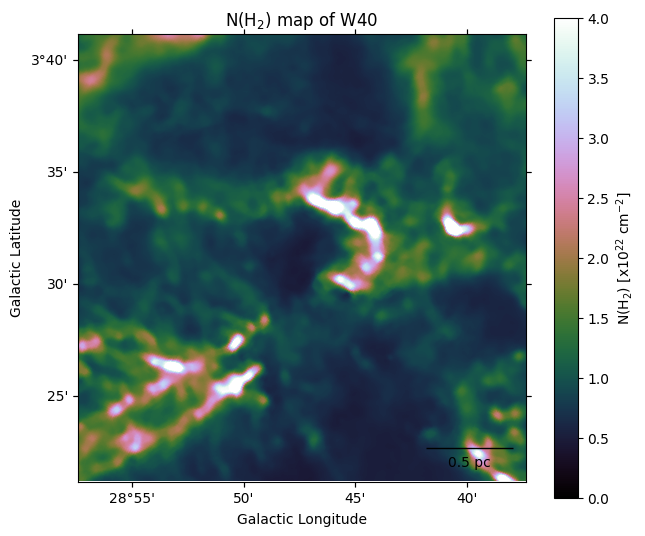

In [24]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u

wcs_galactic = WCS("/home/mingkang/Desktop/NARIT_Internship/carta/TRAO/c18o.fits").celestial[0:2]
fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8], projection=wcs_galactic)
ax.set_aspect('equal')
path_dust_temp = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_dust_temperature_map.fits.gz'
path_n_h2 = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_hires_column_density_map.fits.gz'
im = ax.imshow(fits.getdata(path_n_h2)/1e22, cmap='cubehelix', origin='lower', vmin=0, vmax=4,
               transform=ax.get_transform(WCS(path_n_h2)))

from astropy.visualization import wcsaxes
wcsaxes.add_scalebar(ax=ax, length=7.8006473694957545 /2 * u.arcmin, label='0.5 pc')
plt.colorbar(im, ax=ax, label='N(H$_2$) [x10$^{22}$ cm$^{-2}$]')
ax.set_ylabel('Galactic Latitude')
ax.set_xlabel('Galactic Longitude')
ax.set_title('N(H$_2$) map of W40')

ax.set_xlim(0,60)
ax.set_ylim(0,60)

plt.savefig('h2_column_density_map.png', format='png',bbox_inches='tight')

Code below for Dust Temperature Map (TRAO FoV)

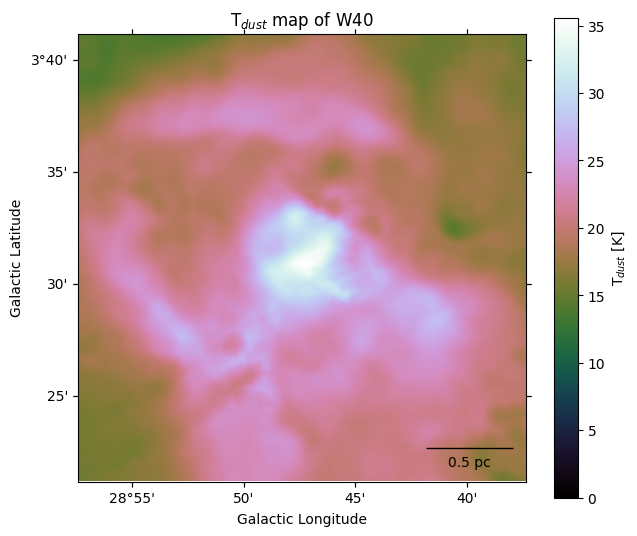

In [25]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u

wcs_galactic = WCS("/home/mingkang/Desktop/NARIT_Internship/carta/TRAO/c18o.fits").celestial[0:2]
fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8], projection=wcs_galactic)
ax.set_aspect('equal')
path_dust_temp = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_dust_temperature_map.fits.gz'
path_n_h2 = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_hires_column_density_map.fits.gz'
im = ax.imshow(fits.getdata(path_dust_temp), cmap='cubehelix', origin='lower', vmin=0,
               transform=ax.get_transform(WCS(path_n_h2)))

from astropy.visualization import wcsaxes
wcsaxes.add_scalebar(ax=ax, length=7.8006473694957545 /2 * u.arcmin, label='0.5 pc')
plt.colorbar(im, ax=ax, label='T$_{dust}$ [K]')
ax.set_ylabel('Galactic Latitude')
ax.set_xlabel('Galactic Longitude')
ax.set_title('T$_{dust}$ map of W40')

ax.set_xlim(0,60)
ax.set_ylim(0,60)

plt.savefig('dust_temp_map.png', format='png',bbox_inches='tight')

In [4]:
WCS("/home/mingkang/Desktop/NARIT_Internship/carta/TRAO/c18o.fits").celestial[0:2]

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-SFL'  'GLAT-SFL'  
CRVAL : 28.79  3.52  
CRPIX : 31.00005762983  31.00005762983  
NAXIS : 61  2

This code is used to plot W40 H2 Column density map and dust temperature map from Herschel Gould Belt Survey (Bigger Fov)

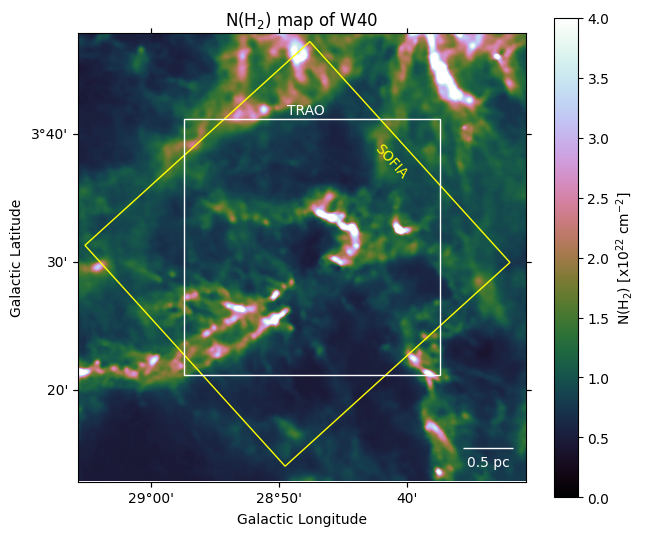

In [101]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib.patches import Rectangle, Polygon
from regions import Regions

wcs_galactic = WCS("/home/mingkang/Desktop/NARIT_Internship/carta/TRAO/c18o.fits").celestial[0:2]
fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8], projection=wcs_galactic)
ax.set_aspect('equal')
path_dust_temp = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_dust_temperature_map.fits.gz'
path_n_h2 = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_hires_column_density_map.fits.gz'
im = ax.imshow(fits.getdata(path_n_h2)/1e22, cmap='cubehelix', origin='lower', vmin=0, vmax=4,
               transform=ax.get_transform(WCS(path_n_h2)))

from astropy.visualization import wcsaxes
wcsaxes.add_scalebar(ax=ax, length=7.8006473694957545 /2 * u.arcmin, label='0.5 pc', color='white')
plt.colorbar(im, ax=ax, label='N(H$_2$) [x10$^{22}$ cm$^{-2}$]')
ax.set_ylabel('Galactic Latitude')
ax.set_xlabel('Galactic Longitude')
ax.set_title('N(H$_2$) map of W40')

ax.set_xlim(-25,80)
ax.set_ylim(-25,80)

regions = Regions.read('/home/mingkang/Desktop/NARIT_Internship/carta/TRAO and SOFIA regions')
region = regions[1]
pix_region = region.to_pixel(wcs_galactic)
center = pix_region.center
width = pix_region.width
height = pix_region.height
angle = region.angle.value

rectangle = Rectangle((center.x - width / 2, center.y - height / 2), width, height, angle=angle, 
                      rotation_point='center', color='yellow', linewidth=1, fill=False)
ax.add_patch(rectangle)

rectangle = Rectangle((0, 0), 60, 60, fill=False, color='white', linewidth=1)
ax.add_patch(rectangle)

# Add the text to the plot
x_text = center.x + width / 4
y_text = center.y + height / 4
text_content = 'SOFIA'
text_rotation = angle  # Rotate the text 45 degrees

# Add the text to the plot
ax.text(x_text, y_text, text_content, color='yellow', rotation=angle)
ax.text(24, 61, "TRAO", color='white', rotation=0)

plt.savefig('h2_column_density_map_wide.png', format='png',bbox_inches='tight')

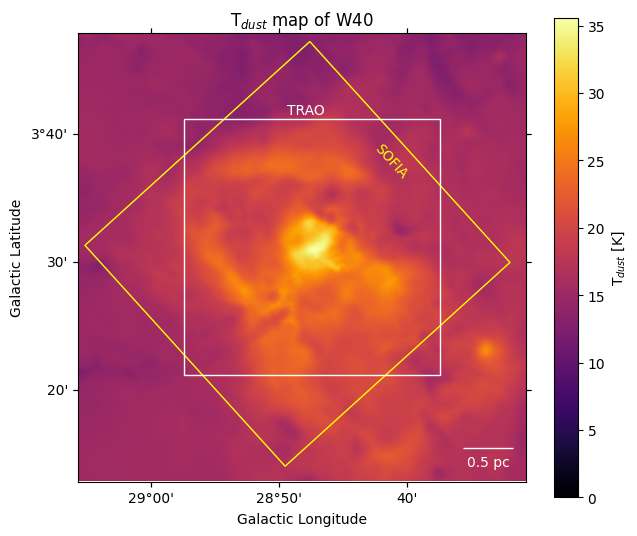

In [100]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib.patches import Rectangle, Polygon
from regions import Regions

wcs_galactic = WCS("/home/mingkang/Desktop/NARIT_Internship/carta/TRAO/c18o.fits").celestial[0:2]
fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8], projection=wcs_galactic)
ax.set_aspect('equal')
path_dust_temp = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_dust_temperature_map.fits.gz'
path_n_h2 = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_hires_column_density_map.fits.gz'
im = ax.imshow(fits.getdata(path_dust_temp), cmap='inferno', origin='lower', vmin=0,
               transform=ax.get_transform(WCS(path_n_h2)))

from astropy.visualization import wcsaxes
wcsaxes.add_scalebar(ax=ax, length=7.8006473694957545 /2 * u.arcmin, 
                     label='0.5 pc', color='white')
plt.colorbar(im, ax=ax, label='T$_{dust}$ [K]')
ax.set_ylabel('Galactic Latitude')
ax.set_xlabel('Galactic Longitude')
ax.set_title('T$_{dust}$ map of W40')

ax.set_xlim(-25,80)
ax.set_ylim(-25,80)

regions = Regions.read('/home/mingkang/Desktop/NARIT_Internship/carta/TRAO and SOFIA regions')
region = regions[1]
pix_region = region.to_pixel(wcs_galactic)
center = pix_region.center
width = pix_region.width
height = pix_region.height
angle = region.angle.value

rectangle = Rectangle((center.x - width / 2, center.y - height / 2), width, height, angle=angle, 
                      rotation_point='center', color='yellow', linewidth=1, fill=False)
ax.add_patch(rectangle)

rectangle = Rectangle((0, 0), 60, 60, fill=False, color='white', linewidth=1)
ax.add_patch(rectangle)

# Add the text to the plot
x_text = center.x + width / 4
y_text = center.y + height / 4
text_content = 'SOFIA'
text_rotation = angle  # Rotate the text 45 degrees

# Add the text to the plot
ax.text(x_text, y_text, text_content, color='yellow', rotation=angle)
ax.text(24, 61, "TRAO", color='white', rotation=0)

plt.savefig('dust_temp_map_wide.png', format='png',bbox_inches='tight')

Experiment: To see the correlation between H2 column density and dust temperature

In [103]:
fits.getdata(path_n_h2).shape

(5657, 5233)

In [104]:
fits.getdata(path_dust_temp).shape

(5657, 5233)

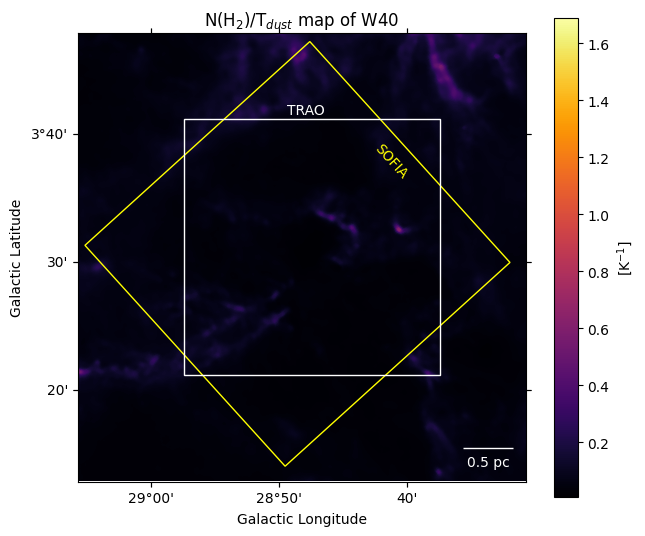

In [109]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib.patches import Rectangle, Polygon
from regions import Regions

wcs_galactic = WCS("/home/mingkang/Desktop/NARIT_Internship/carta/TRAO/c18o.fits").celestial[0:2]
fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8], projection=wcs_galactic)
ax.set_aspect('equal')
path_dust_temp = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_dust_temperature_map.fits.gz'
path_n_h2 = '/home/mingkang/Desktop/NARIT_Internship/carta/Herschel/HGBS_aquilaM2_hires_column_density_map.fits.gz'
data = (fits.getdata(path_n_h2)/1e22)/fits.getdata(path_dust_temp)
im = ax.imshow(data, cmap='inferno', origin='lower',
               transform=ax.get_transform(WCS(path_n_h2)))

from astropy.visualization import wcsaxes
wcsaxes.add_scalebar(ax=ax, length=7.8006473694957545 /2 * u.arcmin, 
                     label='0.5 pc', color='white')
plt.colorbar(im, ax=ax, label='[K$^{-1}$]')
ax.set_ylabel('Galactic Latitude')
ax.set_xlabel('Galactic Longitude')
ax.set_title('N(H$_2$)/T$_{dust}$ map of W40')

ax.set_xlim(-25,80)
ax.set_ylim(-25,80)

regions = Regions.read('/home/mingkang/Desktop/NARIT_Internship/carta/TRAO and SOFIA regions')
region = regions[1]
pix_region = region.to_pixel(wcs_galactic)
center = pix_region.center
width = pix_region.width
height = pix_region.height
angle = region.angle.value

rectangle = Rectangle((center.x - width / 2, center.y - height / 2), width, height, angle=angle, 
                      rotation_point='center', color='yellow', linewidth=1, fill=False)
ax.add_patch(rectangle)

rectangle = Rectangle((0, 0), 60, 60, fill=False, color='white', linewidth=1)
ax.add_patch(rectangle)

# Add the text to the plot
x_text = center.x + width / 4
y_text = center.y + height / 4
text_content = 'SOFIA'
text_rotation = angle  # Rotate the text 45 degrees

# Add the text to the plot
ax.text(x_text, y_text, text_content, color='yellow', rotation=angle)
ax.text(24, 61, "TRAO", color='white', rotation=0)

plt.savefig('nh2_dust_temp.png', format='png',bbox_inches='tight')